In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve


In [6]:
data=pd.read_csv('train_LZdllcl.csv')


In [ ]:
# Examining the Data

In [7]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [8]:
data.shape

(54808, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
# Descriptive Statistics

In [8]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [80]:
data['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [81]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [82]:
data['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

# Visualization

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

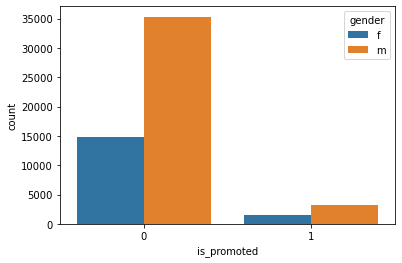

In [59]:
sns.countplot(x='is_promoted',hue='gender',data=data)

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

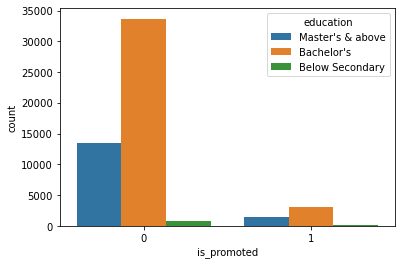

In [62]:
sns.countplot(x='is_promoted',hue='education',data=data)

In [63]:
data[['education'][['KPIs_met >80%']==1]]

0        Master's & above
1              Bachelor's
2              Bachelor's
3              Bachelor's
4              Bachelor's
               ...       
54803          Bachelor's
54804    Master's & above
54805          Bachelor's
54806                 NaN
54807          Bachelor's
Name: education, Length: 54808, dtype: object

<AxesSubplot:xlabel='education', ylabel='count'>

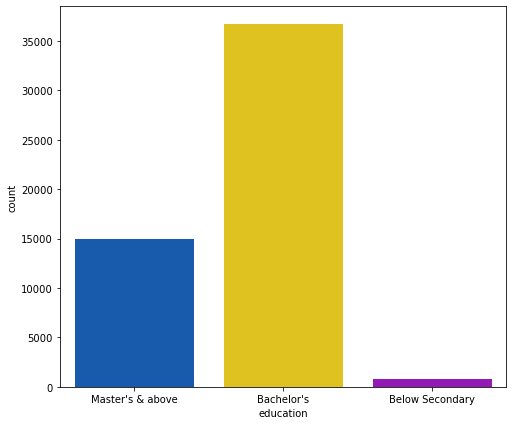

In [64]:
plt.figure(figsize=(8,7))
sns.countplot(x=data['education'], data=data,palette="prism")

<AxesSubplot:xlabel='education', ylabel='Count'>

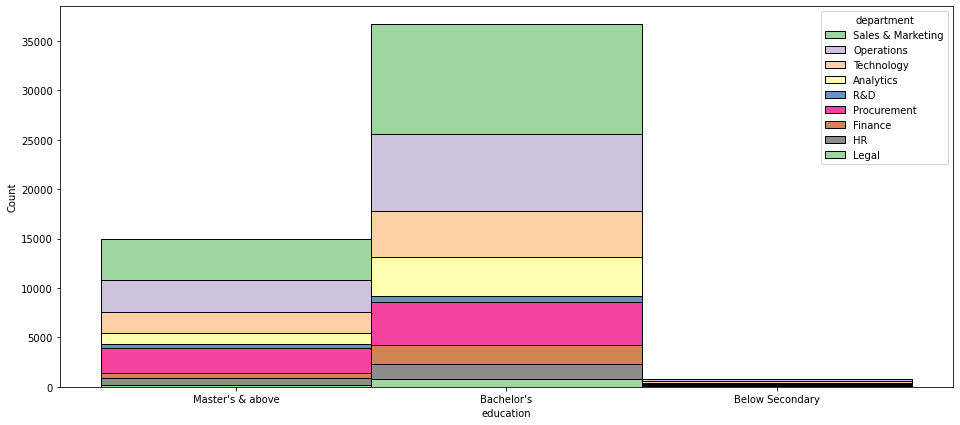

In [65]:
plt.figure(figsize=(16,7))
sns.histplot(x='education',data=data,bins=np.arange(0,85,5),hue='department',palette='Accent',multiple='stack')
#plt.xticks(np.arange(0,85,5))

In [9]:
labelencoder=LabelEncoder()
for column in data.columns:
    data['education'] = labelencoder.fit_transform(data['education'])

In [10]:
data['education']=data.groupby(['department'])['education'].apply(lambda x: x.fillna(x.median()))

<AxesSubplot:xlabel='previous_year_rating', ylabel='count'>

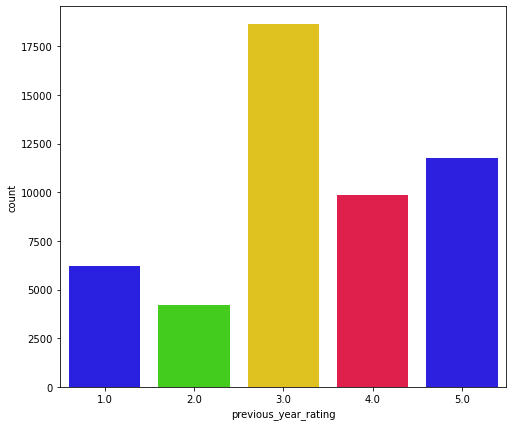

In [124]:
plt.figure(figsize=(8,7))
sns.countplot(x=data['previous_year_rating'], data=data,palette="prism")

In [11]:
data['previous_year_rating'].fillna(data['previous_year_rating'].median(), inplace=True)


In [12]:
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [13]:
data.dtypes

employee_id               int64
department               object
region                   object
education                 int64
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [14]:
obj_column= data.select_dtypes(include='object')

In [90]:
obj_column

,department,region,gender,recruitment_channel
0,Sales & Marketing,region_7,f,sourcing
1,Operations,region_22,m,other
2,Sales & Marketing,region_19,m,sourcing
3,Sales & Marketing,region_23,m,other
4,Technology,region_26,m,other
...,...,...,...,...
54803,Technology,region_14,m,sourcing
54804,Operations,region_27,f,other
54805,Analytics,region_1,m,other
54806,Sales & Marketing,region_9,m,sourcing


In [15]:
for column in obj_column:
    data[column] = labelencoder.fit_transform(data[column])

In [92]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [93]:
# Correlation Between the variables

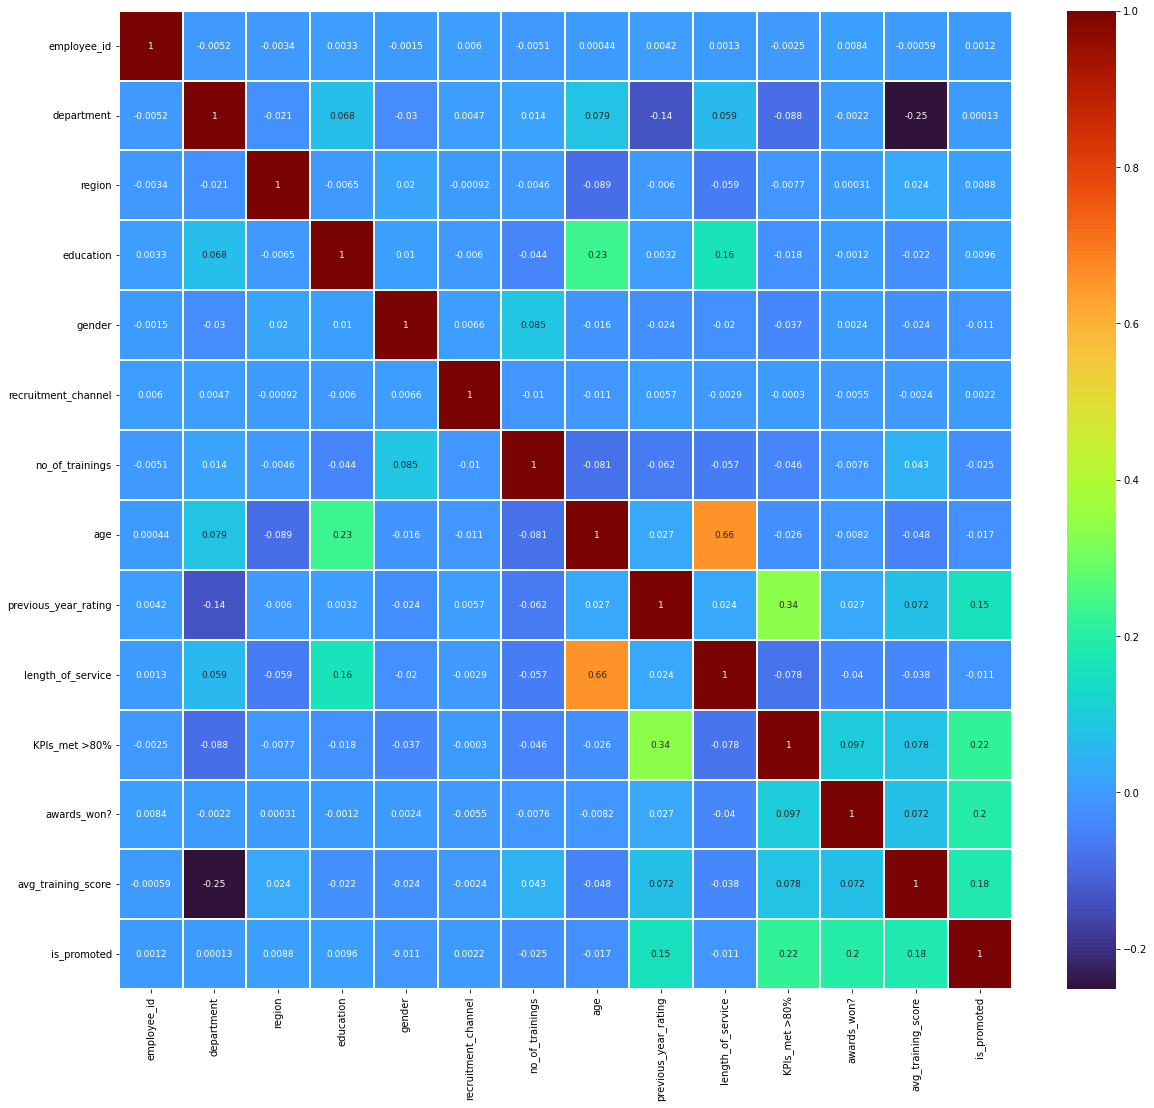

In [94]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(),linewidths=.1,cmap="turbo", annot=True, annot_kws={"size": 9})
plt.yticks(rotation=0);

From the above heatmap we can infer that, the least corelatimg varible is avg_training_score.
Usually, the least correlating variable is the most important one for classification. 
In this case, “avg_training_score” is -0.25

In [16]:
data[['is_promoted','avg_training_score']].groupby('avg_training_score').mean().sort_values(by='is_promoted', ascending=False)

,is_promoted
avg_training_score,
99,1.000000
98,1.000000
97,1.000000
95,1.000000
96,0.979167
...,...
42,0.032258
46,0.031690
44,0.029851


# Data Preparation:

In [17]:
from sklearn.model_selection import train_test_split

X=data.drop(['is_promoted'],axis=1)
y=data['is_promoted']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [97]:
# Random Forest Classification

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Test Accuracy: 93.74%


In [19]:
print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100,2)))
y_pred_dt = rf.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))

Test Accuracy: 93.74%
Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.91      0.27      0.42       908

    accuracy                           0.94     10962
   macro avg       0.92      0.63      0.69     10962
weighted avg       0.94      0.94      0.92     10962

[[10029    25]
 [  661   247]]


In [ ]:
# Decision Tree

In [118]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

print(confusion_matrix(y_test,y_pred_dt))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.95      0.94      0.94     10054
           1       0.39      0.45      0.42       908

    accuracy                           0.90     10962
   macro avg       0.67      0.69      0.68     10962
weighted avg       0.90      0.90      0.90     10962

Test Accuracy: 89.6%
[[9412  642]
 [ 498  410]]


In [ ]:
# Logistic Regression Classification

In [119]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 92.0%


In [106]:
y_pred_dt = lr.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.92      1.00      0.96     10054
           1       0.33      0.00      0.00       908

    accuracy                           0.92     10962
   macro avg       0.63      0.50      0.48     10962
weighted avg       0.87      0.92      0.88     10962

[[10052     2]
 [  907     1]]


In [ ]:
# KNN Classification

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

acc_values=[]
neighbours=np.arange(1,15)
for k in neighbours:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    model=classifier.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    acc=accuracy_score(y_test,y_predict)
    acc_values.append(acc)
acc_values

[0.8526728699142492,
 0.911421273490239,
 0.9003831417624522,
 0.9157088122605364,
 0.9126071884692575,
 0.9168947272395548,
 0.9158000364896917,
 0.9170771756978654,
 0.9167122787812443,
 0.9172596241561759,
 0.9172596241561759,
 0.9171683999270206,
 0.9171683999270206,
 0.9171683999270206]

Text(0, 0.5, 'accuracy value')

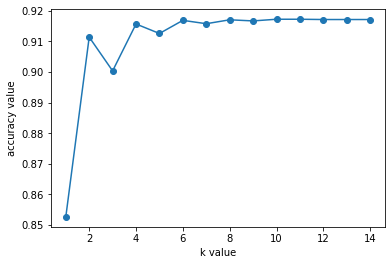

In [108]:
plt.plot(neighbours,acc_values,"o-")
plt.xlabel("k value")
plt.ylabel("accuracy value")

In [109]:
classifier=KNeighborsClassifier(n_neighbors=7,metric='minkowski')
model=classifier.fit(X_train,y_train)
y_predict=model.predict(X_test)


print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))

print("accuracy_score is",  accuracy_score(y_test,y_predict) )
print("precision_score is" ,precision_score(y_test,y_predict) )
print("recall_score is" ,recall_score(y_test,y_predict) )
print("f1_score is" ,f1_score(y_test,y_predict) )


Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.92      1.00      0.96     10054
           1       0.33      0.00      0.00       908

    accuracy                           0.92     10962
   macro avg       0.63      0.50      0.48     10962
weighted avg       0.87      0.92      0.88     10962

[[10052     2]
 [  907     1]]
accuracy_score is 0.9158000364896917
precision_score is 0.17391304347826086
recall_score is 0.004405286343612335
f1_score is 0.008592910848549948


In [ ]:
# SVM Classification

In [110]:
from sklearn.svm import SVC,LinearSVC

linear_svc=LinearSVC()
linear_svc.fit(X_train, y_train)
linear_svc_predictions=linear_svc.predict(X_test)

print("Test Accuracy: {}%".format(round(linear_svc.score(X_test, y_test)*100,2)))
y_pred_dt = linear_svc.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))

Test Accuracy: 90.37%
Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.92      0.98      0.95     10054
           1       0.15      0.04      0.06       908

    accuracy                           0.90     10962
   macro avg       0.54      0.51      0.50     10962
weighted avg       0.86      0.90      0.88     10962

[[9873  181]
 [ 875   33]]


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Naive Bayes Classification

In [111]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(nb.score(X_test, y_test)*100, 2)))

Test Accuracy: 91.95%


In [112]:
print("Test Accuracy: {}%".format(round(nb.score(X_test, y_test)*100,2)))
y_pred_dt = nb.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))

Test Accuracy: 91.95%
Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.92      1.00      0.96     10054
           1       0.91      0.03      0.06       908

    accuracy                           0.92     10962
   macro avg       0.91      0.52      0.51     10962
weighted avg       0.92      0.92      0.88     10962

[[10051     3]
 [  879    29]]


In [ ]:
Score is highest for RandomForest

In [ ]:
# Predictions
Predicting some of the X_test results and matching it with true i.e. y_test values using RandomForest Classifier.

In [132]:
preds = rf.predict(X_test)
print(preds[:36])
print(y_test[:36].values)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [20]:
test_data=pd.read_csv('test_2umaH9m.csv')

In [21]:
for column in obj_column:
    test_data[column] = labelencoder.fit_transform(test_data[column])
    
for column in data.columns:
    test_data['education'] = labelencoder.fit_transform(test_data['education'])
    
test_data['previous_year_rating'].fillna(test_data['previous_year_rating'].median(), inplace=True)


In [22]:
test_data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [ ]:
test

In [23]:
pred_test_data=rf.predict(test_data)

In [24]:
pred_test_data

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [26]:
final = pd.DataFrame()
final['employee_id']=test_data.employee_id


#pd.concat([tit_df,sex,embarked],axis=1)

In [27]:
final['employee_id']


0         8724
1        74430
2        72255
3        38562
4        64486
         ...  
23485    53478
23486    25600
23487    45409
23488     1186
23489     5973
Name: employee_id, Length: 23490, dtype: int64

In [36]:
final['is_promoted']=pred_test_data
final = final.reset_index(drop=True)

In [37]:
final

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [30]:
final['is_promoted'].value_counts()

0    22949
1      541
Name: is_promoted, dtype: int64

In [38]:
final.to_csv('submission.csv',index=False)